In [319]:
#Naby
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [320]:
def get_rates(amount, currency, converted_currency, amount_of_days):
    
    # We set the start date 
    today_date = datetime.datetime(2019, 8, 14)
    date_1year = (today_date - datetime.timedelta(days=1 *amount_of_days))

    # Requests
    url = f'https://api.exchangerate.host/timeseries'
    payload = {'base': currency, "amount": amount, "start_date": date_1year.date(),
                'end_date': today_date.date()}
    response = requests.get(url, params=payload)
    data = response.json()

    # create a dict to store data
    currency_history = {}
    #rate_history_array = []

    for item in data['rates']:
        current_data = item
        currency_rate = data['rates'][item][converted_currency]

        currency_history[current_data] = [currency_rate]
        
        # Clean data
        pd_data = pd.DataFrame(currency_history).transpose()
        pd_data.columns = ['Rates']
        
    return pd_data

In [321]:
# I decided to work with South African rand

df = get_rates(1, 'EUR', 'ZAR', 500)

In [322]:
df

,Rates
2018-04-01,14.5521
2018-04-02,14.5717
2018-04-03,14.5693
2018-04-04,14.5214
2018-04-05,14.5857
...,...
2019-03-27,16.2530
2019-03-28,16.4337
2019-03-29,16.3900
2019-03-30,16.3900


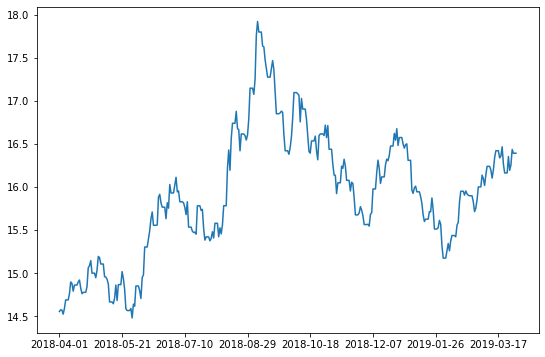

In [323]:
# We can observe the variation of the within one year
# This API allows to get only requests for one year of data

df['Rates'].plot(figsize=(9,6))
plt.show()

In [324]:
# This command give the mean

df.mean()

Rates    15.905913
dtype: float64

In [325]:
df

,Rates
2018-04-01,14.5521
2018-04-02,14.5717
2018-04-03,14.5693
2018-04-04,14.5214
2018-04-05,14.5857
...,...
2019-03-27,16.2530
2019-03-28,16.4337
2019-03-29,16.3900
2019-03-30,16.3900


In [326]:
df.reset_index(inplace=True)

In [327]:
df

,index,Rates
0,2018-04-01,14.5521
1,2018-04-02,14.5717
2,2018-04-03,14.5693
3,2018-04-04,14.5214
4,2018-04-05,14.5857
...,...,...
360,2019-03-27,16.2530
361,2019-03-28,16.4337
362,2019-03-29,16.3900
363,2019-03-30,16.3900


In [328]:
df.rename({'index':'date'}, axis = 1, inplace = True)

In [329]:
df

,date,Rates
0,2018-04-01,14.5521
1,2018-04-02,14.5717
2,2018-04-03,14.5693
3,2018-04-04,14.5214
4,2018-04-05,14.5857
...,...,...
360,2019-03-27,16.2530
361,2019-03-28,16.4337
362,2019-03-29,16.3900
363,2019-03-30,16.3900


In [330]:
# I transform the date series into datetime format

df['date']=pd.to_datetime(df['date'])

In [331]:
df

,date,Rates
0,2018-04-01,14.5521
1,2018-04-02,14.5717
2,2018-04-03,14.5693
3,2018-04-04,14.5214
4,2018-04-05,14.5857
...,...,...
360,2019-03-27,16.2530
361,2019-03-28,16.4337
362,2019-03-29,16.3900
363,2019-03-30,16.3900


In [332]:
# I set the date as index

df.set_index('date', inplace = True)

In [333]:
df

,Rates
date,
2018-04-01,14.5521
2018-04-02,14.5717
2018-04-03,14.5693
2018-04-04,14.5214
2018-04-05,14.5857
...,...
2019-03-27,16.2530
2019-03-28,16.4337
2019-03-29,16.3900


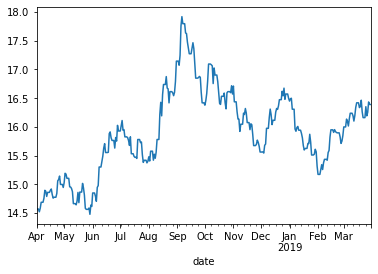

In [334]:
# We plot the variation of the currency between 2019 and 2020

df.loc['2018':'2019']['Rates'].plot() 

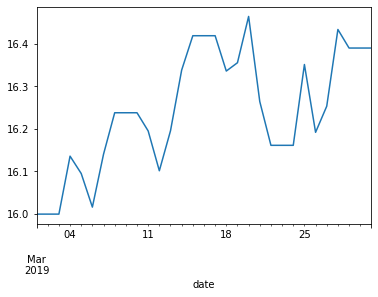

In [335]:
# We plot the variation of the currency during the april month of 2019
# We plot the variation of the currency during the april month of 2019

df.loc['2019-03']['Rates'].plot() 

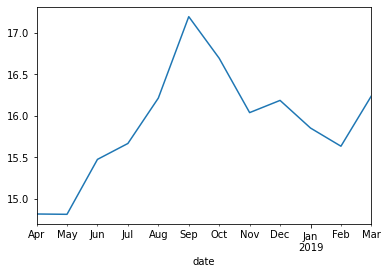

In [336]:
# We use the resample function that groups our data by frequency
# Here we plot the variation by the mean of each month between 2019 and 2020

df['2018':'2019']['Rates'].resample('M').mean().plot()

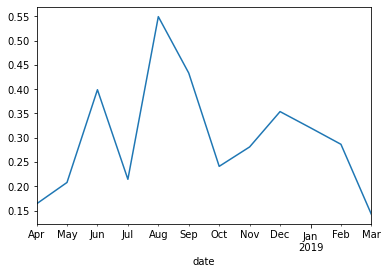

In [337]:
# We use the same with std to get the volatility
df['2018':'2019']['Rates'].resample('M').std().plot()

In [338]:
# We can get these stats in the same graph with aggragation

df['2019':'2020']['Rates'].resample('M').agg(['mean', 'std'])

,mean,std
date,,
2019-01-31,15.854168,0.320494
2019-02-28,15.635154,0.286554
2019-03-31,16.241365,0.142375


In [339]:
# More stats

df.loc['2019':'2020']['Rates'].describe()

count    90.000000
mean     15.919398
std       0.359687
min      15.172300
25%      15.624700
50%      15.942000
75%      16.226975
max      16.498900
Name: Rates, dtype: float64

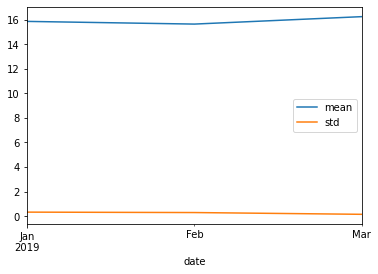

In [340]:
# We observe the mean and the standard deviation within one year

df['2019':'2020']['Rates'].resample('M').agg(['mean', 'std']).plot()

In [341]:
# The idea is to get series that will map the situation within one year

dataset = df[["Rates"]]
dataset.columns = ["target"]
for i in range(1, 30):
    dataset["t-{}".format(i)] = dataset.target.shift(i)
dataset.head(15)

,target,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t-20,t-21,t-22,t-23,t-24,t-25,t-26,t-27,t-28,t-29
date,,,,,,,,,,,,,,,,,,,,,
2018-04-01,14.5521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-02,14.5717,14.5521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-03,14.5693,14.5717,14.5521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-04,14.5214,14.5693,14.5717,14.5521,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-05,14.5857,14.5214,14.5693,14.5717,14.5521,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-06,14.6870,14.5857,14.5214,14.5693,14.5717,14.5521,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-07,14.6870,14.6870,14.5857,14.5214,14.5693,14.5717,14.5521,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-08,14.6870,14.6870,14.6870,14.5857,14.5214,14.5693,14.5717,14.5521,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-09,14.7563,14.6870,14.6870,14.6870,14.5857,14.5214,14.5693,14.5717,14.5521,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
dataset=dataset.iloc[30:]
dataset

,target,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t-20,t-21,t-22,t-23,t-24,t-25,t-26,t-27,t-28,t-29
date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,15.0301,14.9452,14.9975,14.9975,14.9975,15.1431,15.0837,15.0605,14.8404,14.7747,...,14.8789,14.8952,14.7563,14.6870,14.6870,14.6870,14.5857,14.5214,14.5693,14.5717
2018-05-02,15.1917,15.0301,14.9452,14.9975,14.9975,14.9975,15.1431,15.0837,15.0605,14.8404,...,14.7887,14.8789,14.8952,14.7563,14.6870,14.6870,14.6870,14.5857,14.5214,14.5693
2018-05-03,15.1769,15.1917,15.0301,14.9452,14.9975,14.9975,14.9975,15.1431,15.0837,15.0605,...,14.8594,14.7887,14.8789,14.8952,14.7563,14.6870,14.6870,14.6870,14.5857,14.5214
2018-05-04,15.1037,15.1769,15.1917,15.0301,14.9452,14.9975,14.9975,14.9975,15.1431,15.0837,...,14.8594,14.8594,14.7887,14.8789,14.8952,14.7563,14.6870,14.6870,14.6870,14.5857
2018-05-05,15.1037,15.1037,15.1769,15.1917,15.0301,14.9452,14.9975,14.9975,14.9975,15.1431,...,14.8594,14.8594,14.8594,14.7887,14.8789,14.8952,14.7563,14.6870,14.6870,14.6870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-27,16.2530,16.1915,16.3512,16.1609,16.1609,16.1609,16.2640,16.4644,16.3554,16.3358,...,16.1400,16.0154,16.0945,16.1354,15.9989,15.9989,15.9989,15.8483,15.7530,15.7120
2019-03-28,16.4337,16.2530,16.1915,16.3512,16.1609,16.1609,16.1609,16.2640,16.4644,16.3554,...,16.2376,16.1400,16.0154,16.0945,16.1354,15.9989,15.9989,15.9989,15.8483,15.7530
2019-03-29,16.3900,16.4337,16.2530,16.1915,16.3512,16.1609,16.1609,16.1609,16.2640,16.4644,...,16.2376,16.2376,16.1400,16.0154,16.0945,16.1354,15.9989,15.9989,15.9989,15.8483


In [343]:
# We prepare the train set to train the model and the test to validate it

train, test = dataset['2018-04-01':'2019-02-28'], dataset['2019-03-01':'2019-03-31']

In [344]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train.drop(['target'], axis=1))
test_features_scaled = scaler.transform(test.drop(['target'], axis=1))

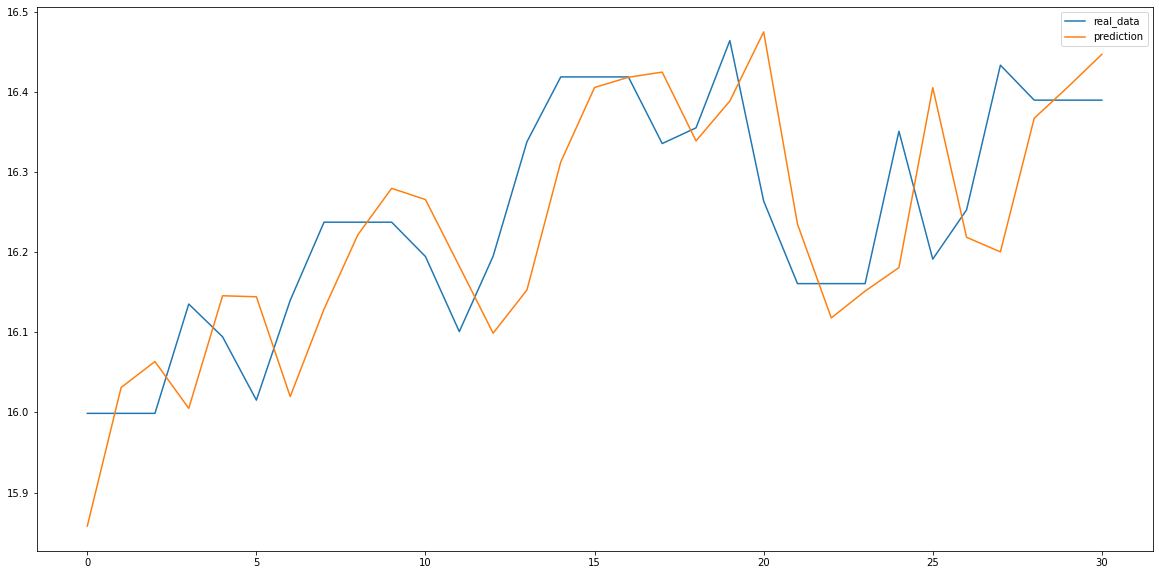

In [345]:
# Prediction with the liear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# We train our model on the train features and target, by passing them as the arguments to the model method "fit"
model.fit(train_features_scaled, train['target'])

# We use trained model on the test features using the model method "predict", thus obtaining predicted target values
prediction = model.predict(test_features_scaled)
    
# We then plot the predicted target values along with actual ones, to evaluate visually the quality of the predictive model.
plt.figure(figsize=(20, 10))
plt.plot(test['target'].values, label="real_data")
plt.plot(prediction, label="prediction")
plt.legend()

In [346]:
# We evaluate the score of this model

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 score is {}".format(r2_score(test['target'].values, prediction)))
print("MSE score is {}".format(mean_squared_error(test['target'].values, prediction)))
print("MAE score is {}".format(mean_absolute_error(test['target'].values, prediction)))

R2 score is 0.4135324604769651
MSE score is 0.011504654851788193
MAE score is 0.08567096761466213


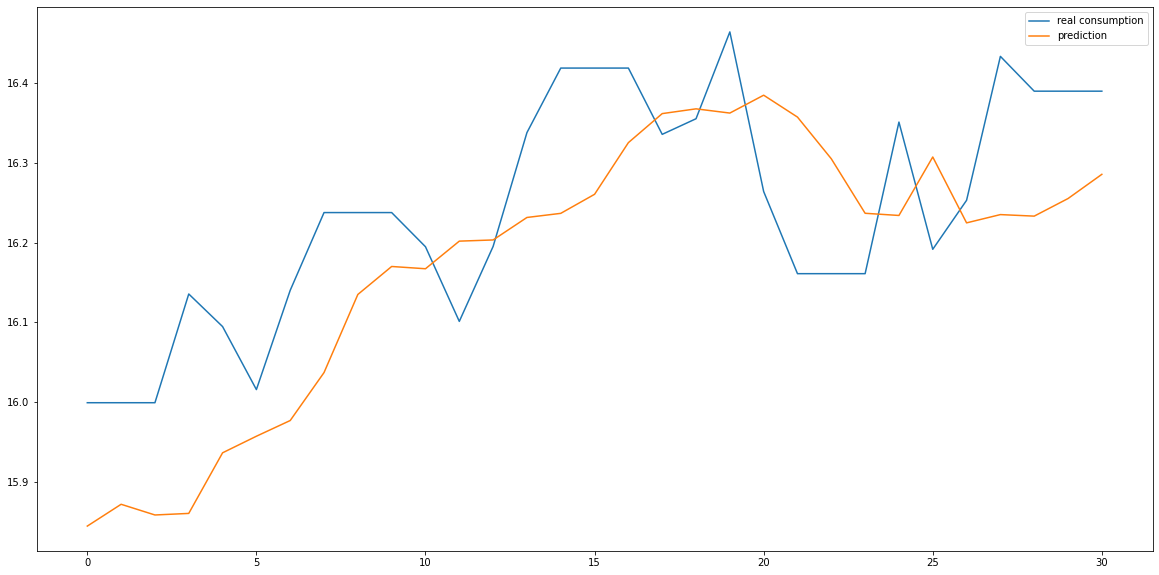

In [347]:
# Prediction with random forest regressor model


from sklearn.ensemble import RandomForestRegressor
from numpy import asarray

train_features = train.drop(['target'], axis=1, inplace=False)
train_target = train['target']
test_features =  test.drop(['target'],axis=1, inplace=False)

model_RF = RandomForestRegressor(max_depth=10, random_state=0, max_features=3, n_estimators=200)
model_RF.fit(asarray(train_features), asarray(train_target))

predictionRf = model_RF.predict(test_features)
    
plt.figure(figsize=(20, 10))
plt.plot(test['target'].values, label="real consumption")
plt.plot(predictionRf, label="prediction")
plt.legend()

In [348]:
# We evaluate the score of this model


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 score is {}".format(r2_score(test['target'].values, predictionRf)))
print("MSE score is {}".format(mean_squared_error(test['target'].values, predictionRf)))
print("MAE score is {}".format(mean_absolute_error(test['target'].values, predictionRf)))

R2 score is 0.09836571255487492
MSE score is 0.017687238560603617
MAE score is 0.1181290734957481
